In [1]:
from FinancialMachineLearning.labeling.labeling import *

In [2]:
import os
os.chdir('..')
os.chdir('..')
os.getcwd()

'/Users/junghunlee/Desktop/Pycharm/FinancialMachineLearning'

In [3]:
dollar = pd.read_csv('./Data/dollar_IVEfuture.csv', index_col = 0, parse_dates = True)

In [4]:
dollar = dollar[~dollar.index.duplicated(keep = 'first')]

In [5]:
dollar

,tick_num,open,high,low,close,volume,cum_buy_volume,cum_ticks,cum_dollar_value
date_time,,,,,,,,,
2009-09-28 09:46:34,80,50.79,51.070,50.7100,51.07,20044,13264,80,1.020027e+06
2009-09-28 09:52:47,142,51.07,51.148,51.0500,51.13,21024,19774,62,1.073986e+06
2009-09-28 09:54:38,201,51.14,51.150,51.1290,51.13,19951,6951,59,1.020145e+06
2009-09-28 09:55:26,243,51.13,51.150,51.1300,51.14,19652,18052,42,1.004999e+06
2009-09-28 10:02:48,339,51.14,51.260,51.0800,51.25,19943,11354,96,1.020512e+06
...,...,...,...,...,...,...,...,...,...
2023-09-14 15:54:32,10930083,162.98,163.060,162.9654,162.98,6186,3983,39,1.008408e+06
2023-09-14 15:59:20,10930131,162.99,163.040,162.9299,163.04,7158,4629,48,1.166735e+06
2023-09-14 15:59:39,10930171,163.04,163.050,162.9900,163.00,6316,3266,40,1.029639e+06


#### estimated Volatility

In [6]:
from FinancialMachineLearning.features.volatility import daily_volatility
vol = daily_volatility(dollar.close, lookback = 100)

In [7]:
vol

date_time
2009-09-29 09:51:08         NaN
2009-09-29 10:00:18    0.001396
2009-09-29 10:05:41    0.003878
2009-09-29 10:17:47    0.003328
2009-09-29 10:37:07    0.003094
                         ...   
2023-09-14 15:54:32    0.005170
2023-09-14 15:59:20    0.005199
2023-09-14 15:59:39    0.005217
2023-09-14 15:59:59    0.005236
2023-09-14 16:00:00    0.005257
Name: close, Length: 215792, dtype: float64

#### CUSUM events

In [8]:
from FinancialMachineLearning.filter.filter import cusum_filter

In [9]:
cusum_events = cusum_filter(dollar.close, threshold = vol.mean())

In [10]:
cusum_events

DatetimeIndex(['2009-09-28 09:52:47', '2009-09-28 09:55:26',
               '2009-09-28 10:02:48', '2009-09-28 10:10:21',
               '2009-09-28 10:14:19', '2009-09-28 10:23:42',
               '2009-09-28 10:34:30', '2009-09-28 10:44:48',
               '2009-09-28 11:02:36', '2009-09-28 11:15:44',
               ...
               '2023-09-14 15:01:31', '2023-09-14 15:07:06',
               '2023-09-14 15:19:35', '2023-09-14 15:36:28',
               '2023-09-14 15:46:26', '2023-09-14 15:54:32',
               '2023-09-14 15:59:20', '2023-09-14 15:59:39',
               '2023-09-14 15:59:59', '2023-09-14 16:00:00'],
              dtype='datetime64[ns]', length=196440, freq=None)

In [11]:
dollar = dollar.loc[cusum_events]

In [12]:
dollar

,tick_num,open,high,low,close,volume,cum_buy_volume,cum_ticks,cum_dollar_value
2009-09-28 09:52:47,142,51.07,51.148,51.0500,51.13,21024,19774,62,1.073986e+06
2009-09-28 09:55:26,243,51.13,51.150,51.1300,51.14,19652,18052,42,1.004999e+06
2009-09-28 10:02:48,339,51.14,51.260,51.0800,51.25,19943,11354,96,1.020512e+06
2009-09-28 10:10:21,456,51.26,51.290,51.1900,51.29,21119,14284,81,1.082685e+06
2009-09-28 10:14:19,495,51.29,51.290,51.2500,51.25,19603,15008,39,1.004863e+06
...,...,...,...,...,...,...,...,...,...
2023-09-14 15:54:32,10930083,162.98,163.060,162.9654,162.98,6186,3983,39,1.008408e+06
2023-09-14 15:59:20,10930131,162.99,163.040,162.9299,163.04,7158,4629,48,1.166735e+06
2023-09-14 15:59:39,10930171,163.04,163.050,162.9900,163.00,6316,3266,40,1.029639e+06
2023-09-14 15:59:59,10930208,162.99,163.000,162.9700,162.98,6234,2145,37,1.016030e+06


#### Vertical Barriers

In [13]:
vertical_barrier = add_vertical_barrier(cusum_events, dollar['close'], num_days = 1)
vertical_barrier

2009-09-28 09:52:47   2009-09-29 10:00:18
2009-09-28 09:55:26   2009-09-29 10:00:18
2009-09-28 10:02:48   2009-09-29 10:05:41
2009-09-28 10:10:21   2009-09-29 10:17:47
2009-09-28 10:14:19   2009-09-29 10:17:47
                              ...        
2023-09-13 15:55:22   2023-09-14 15:59:20
2023-09-13 15:58:53   2023-09-14 15:59:20
2023-09-13 15:59:39   2023-09-14 15:59:39
2023-09-13 15:59:59   2023-09-14 15:59:59
2023-09-13 16:00:00   2023-09-14 16:00:00
Length: 196410, dtype: datetime64[ns]

#### Triple Barrier Methods

In [14]:
cusum_events

DatetimeIndex(['2009-09-28 09:52:47', '2009-09-28 09:55:26',
               '2009-09-28 10:02:48', '2009-09-28 10:10:21',
               '2009-09-28 10:14:19', '2009-09-28 10:23:42',
               '2009-09-28 10:34:30', '2009-09-28 10:44:48',
               '2009-09-28 11:02:36', '2009-09-28 11:15:44',
               ...
               '2023-09-14 15:01:31', '2023-09-14 15:07:06',
               '2023-09-14 15:19:35', '2023-09-14 15:36:28',
               '2023-09-14 15:46:26', '2023-09-14 15:54:32',
               '2023-09-14 15:59:20', '2023-09-14 15:59:39',
               '2023-09-14 15:59:59', '2023-09-14 16:00:00'],
              dtype='datetime64[ns]', length=196440, freq=None)

In [15]:
vol = vol[~vol.index.duplicated(keep = 'first')]

<Axes: xlabel='date_time'>

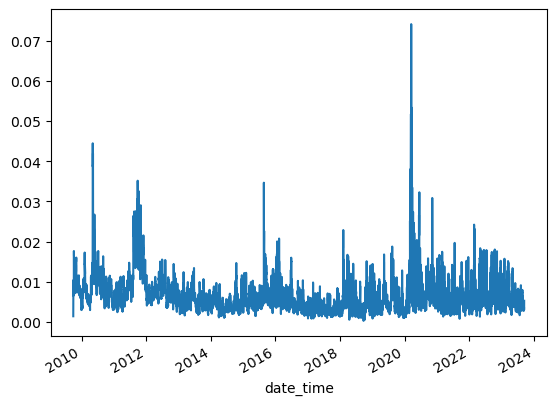

In [16]:
vol.plot()

In [18]:
triple_barrier_events = get_events(close = dollar['close'],
                                   t_events = cusum_events[34:],
                                   pt_sl = [1, 1],
                                   target = vol,
                                   min_ret = 0.01,
                                   num_threads = 1,
                                   vertical_barrier_times = vertical_barrier,
                                   side_prediction = None)
triple_barrier_events

/Users/junghunlee/Desktop/Pycharm/FinancialMachineLearning/FinancialMachineLearning/labeling/labeling.py:17: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for loc, vertical_barrier in events_['t1'].fillna(close.index[-1]).iteritems():
/Users/junghunlee/Desktop/Pycharm/FinancialMachineLearning/FinancialMachineLearning/multiprocess/multiprocess.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df0 = df0.append(i)


,t1,trgt,pt,sl
2009-10-02 09:31:33,2009-10-02 10:35:54,0.010011,1,1
2009-10-02 09:44:59,2009-10-02 10:35:54,0.010268,1,1
2009-10-02 09:53:14,2009-10-05 09:35:17,0.010379,1,1
2009-10-02 10:01:56,2009-10-05 09:35:17,0.010430,1,1
2009-10-02 10:09:13,2009-10-05 09:35:17,0.010453,1,1
...,...,...,...,...
2023-05-08 15:16:20,2023-05-09 15:24:47,0.010701,1,1
2023-05-08 15:16:37,2023-05-09 15:24:47,0.010595,1,1
2023-05-08 15:36:39,2023-05-09 15:40:39,0.010387,1,1
2023-05-08 15:47:11,2023-05-09 15:48:38,0.010283,1,1


#### Labeling

In [19]:
labels = meta_labeling(triple_barrier_events, dollar['close'])
labels

,ret,trgt,bin
2009-10-02 09:31:33,0.011168,0.010011,1
2009-10-02 09:44:59,0.010552,0.010268,1
2009-10-02 09:53:14,0.006066,0.010379,0
2009-10-02 10:01:56,0.008308,0.010430,0
2009-10-02 10:09:13,0.007216,0.010453,0
...,...,...,...
2023-05-08 15:16:20,-0.002736,0.010701,0
2023-05-08 15:16:37,-0.002301,0.010595,0
2023-05-08 15:36:39,-0.002368,0.010387,0
2023-05-08 15:47:11,-0.003483,0.010283,0


In [20]:
labels['bin'].value_counts()

 0    13830
-1     8290
 1     7933
Name: bin, dtype: int64

#### Drop Labels

In [21]:
clean_labels = drop_labels(labels)

In [22]:
clean_labels

,ret,trgt,bin
2009-10-02 09:31:33,0.011168,0.010011,1
2009-10-02 09:44:59,0.010552,0.010268,1
2009-10-02 09:53:14,0.006066,0.010379,0
2009-10-02 10:01:56,0.008308,0.010430,0
2009-10-02 10:09:13,0.007216,0.010453,0
...,...,...,...
2023-05-08 15:16:20,-0.002736,0.010701,0
2023-05-08 15:16:37,-0.002301,0.010595,0
2023-05-08 15:36:39,-0.002368,0.010387,0
2023-05-08 15:47:11,-0.003483,0.010283,0
